# Simple API routine
One of the common scraping techniques is by using APIs provided by different sites and platforms

### The ISS API will inform me about different issues above in the sky, quite interesting information that will be automatically updated thanks to the API functionality

In [1]:
#conda install requests

In [2]:
import requests
import numpy as np

In [3]:
# test to understand what is the error response

In [4]:
response = requests.get("http://api.open-notify.org/trying_to_get_an_404_error")

In [5]:
print(response.status_code)

404


## Using a simple API sample: ISS API site
 http://open-notify.org/

### The main goal is to check how many people are in space at the moment
http://open-notify.org/Open-Notify-API/People-In-Space/

In [6]:
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


In [7]:
print(response.json())

{'people': [{'craft': 'ISS', 'name': 'Mark Vande Hei'}, {'craft': 'ISS', 'name': 'Pyotr Dubrov'}, {'craft': 'ISS', 'name': 'Anton Shkaplerov'}, {'craft': 'Shenzhou 13', 'name': 'Zhai Zhigang'}, {'craft': 'Shenzhou 13', 'name': 'Wang Yaping'}, {'craft': 'Shenzhou 13', 'name': 'Ye Guangfu'}, {'craft': 'ISS', 'name': 'Raja Chari'}, {'craft': 'ISS', 'name': 'Tom Marshburn'}, {'craft': 'ISS', 'name': 'Kayla Barron'}, {'craft': 'ISS', 'name': 'Matthias Maurer'}], 'message': 'success', 'number': 10}


### Indenting function to make json visualization simple and better to the human eye

In [8]:
import json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

{
    "message": "success",
    "number": 10,
    "people": [
        {
            "craft": "ISS",
            "name": "Mark Vande Hei"
        },
        {
            "craft": "ISS",
            "name": "Pyotr Dubrov"
        },
        {
            "craft": "ISS",
            "name": "Anton Shkaplerov"
        },
        {
            "craft": "Shenzhou 13",
            "name": "Zhai Zhigang"
        },
        {
            "craft": "Shenzhou 13",
            "name": "Wang Yaping"
        },
        {
            "craft": "Shenzhou 13",
            "name": "Ye Guangfu"
        },
        {
            "craft": "ISS",
            "name": "Raja Chari"
        },
        {
            "craft": "ISS",
            "name": "Tom Marshburn"
        },
        {
            "craft": "ISS",
            "name": "Kayla Barron"
        },
        {
            "craft": "ISS",
            "name": "Matthias Maurer"
        }
    ]
}


### A future goal is to make web scraping in Wikipedia through the astronauts list and extract information about them like nationality, year of birth,...

In [9]:
names=[]
for item in response.json()['people']:
    names.append(item['name'])
    
print(names)

['Mark Vande Hei', 'Pyotr Dubrov', 'Anton Shkaplerov', 'Zhai Zhigang', 'Wang Yaping', 'Ye Guangfu', 'Raja Chari', 'Tom Marshburn', 'Kayla Barron', 'Matthias Maurer']


In [10]:
crafts=[]
for item in response.json()['people']:
    if item not in crafts:
        crafts.append(item['craft'])
    
print(crafts)

['ISS', 'ISS', 'ISS', 'Shenzhou 13', 'Shenzhou 13', 'Shenzhou 13', 'ISS', 'ISS', 'ISS', 'ISS']


In [11]:
import matplotlib.pyplot as plt

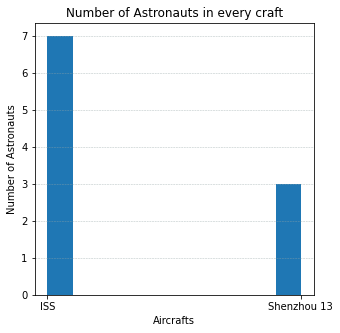

In [15]:
plt.figure(figsize=(5,5))
width=0.3
plt.hist(crafts)
plt.xlabel('Aircrafts')
plt.ylabel('Number of Astronauts')
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.title('Number of Astronauts in every craft')
plt.savefig('Astronauts_histogram.png')

### Now I will try to get the API endpoint requesting parameters

For example, I will try the next: time to check when it will be next times the ISS will pass over Paris

http://api.open-notify.org/iss-pass.json

I just need to set latitud and longitud of Paris location as parameters

In [16]:
parameters = {
    "lat": 48.86,
    "lon": 2.29
}

In [17]:
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

jprint(response.json())

{
    "message": "success",
    "request": {
        "altitude": 100,
        "datetime": 1642443381,
        "latitude": 48.86,
        "longitude": 2.29,
        "passes": 5
    },
    "response": [
        {
            "duration": 643,
            "risetime": 1642448075
        },
        {
            "duration": 650,
            "risetime": 1642453878
        },
        {
            "duration": 651,
            "risetime": 1642459700
        },
        {
            "duration": 645,
            "risetime": 1642465509
        },
        {
            "duration": 509,
            "risetime": 1642471345
        }
    ]
}


In [18]:
pass_times = response.json()['response']
jprint(pass_times)

[
    {
        "duration": 643,
        "risetime": 1642448075
    },
    {
        "duration": 650,
        "risetime": 1642453878
    },
    {
        "duration": 651,
        "risetime": 1642459700
    },
    {
        "duration": 645,
        "risetime": 1642465509
    },
    {
        "duration": 509,
        "risetime": 1642471345
    }
]


In [19]:
paris_risetimes=[]
for v in pass_times:
    time = v['risetime']
    paris_risetimes.append(time)
    
print(paris_risetimes)

[1642448075, 1642453878, 1642459700, 1642465509, 1642471345]


### timestamp is measured in the no. of seconds since Jan 1st 1970
I need a conversion to understand when it will happen

In [20]:
from datetime import datetime

times = []

for rt in paris_risetimes:
    time = datetime.fromtimestamp(rt)
    times.append(time)
    print(time)

2022-01-17 20:34:35
2022-01-17 22:11:18
2022-01-17 23:48:20
2022-01-18 01:25:09
2022-01-18 03:02:25
